In [16]:
import wfdb
import wfdb.processing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Download data if it is not in data folder

In [2]:
wfdb.dl_database("mitdb", "data/mit-bih", annotators='all')

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [3]:
data = 'data/mit-bih/'

In [4]:
# List of Patients
patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']

# Non Beat Symbols
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Classification based on AAMI
AAMI = ['N','L','R','B','A','a','j','S','V','r','F','e','j','n','E','f','/','Q','?']

# Normal Beat Symbols
normal = ['N']

dic = {'N':['N','L','R','B'],
       'S':['A','a','j','S','e','j','n'],
       'V':['V','r','E'],
       'F':['F'],
       'Q':['Q','?','f','/'],
      }


In [5]:
record = wfdb.rdrecord(data+'100',smooth_frames=True)
record.p_signal.shape
# first entry is MLII (Lead II) and second is V1 (sometimes V2, V4, or V5) 

(650000, 2)

In [6]:
t = [x/360 for x in list(range(10800))]

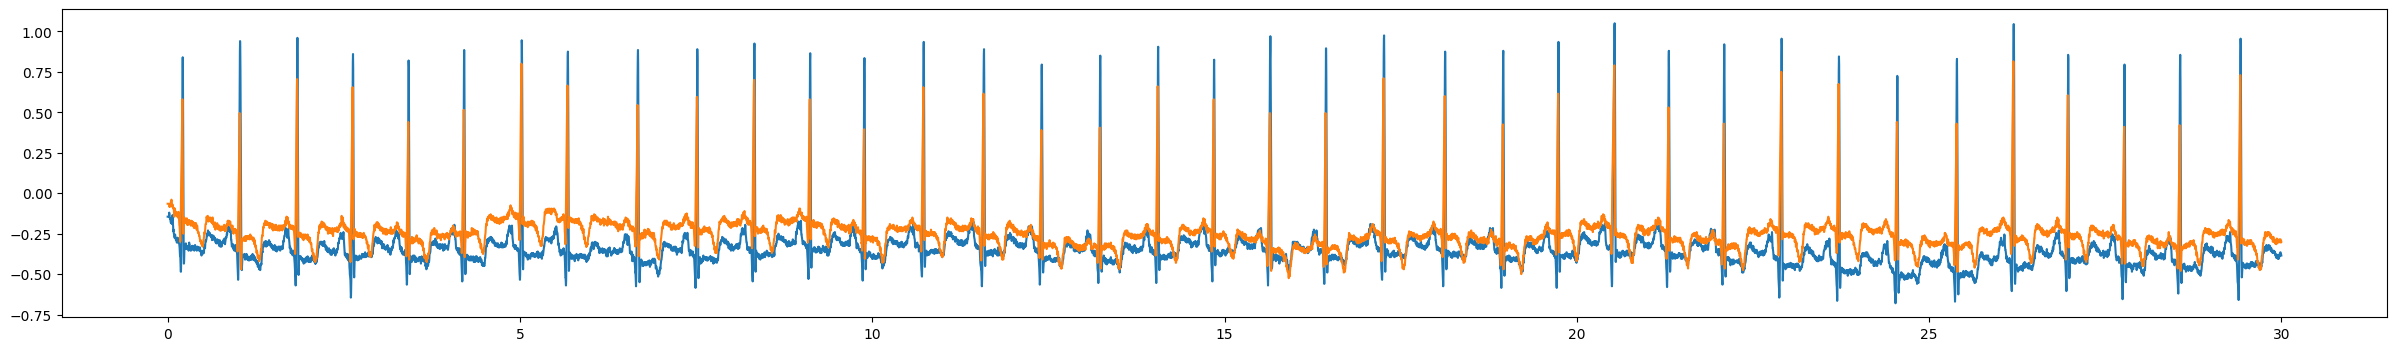

In [7]:
plt.figure(figsize=(30, 4))
plt.plot(t, record.p_signal[:10800,0])
plt.plot(t, record.p_signal[:10800,1])

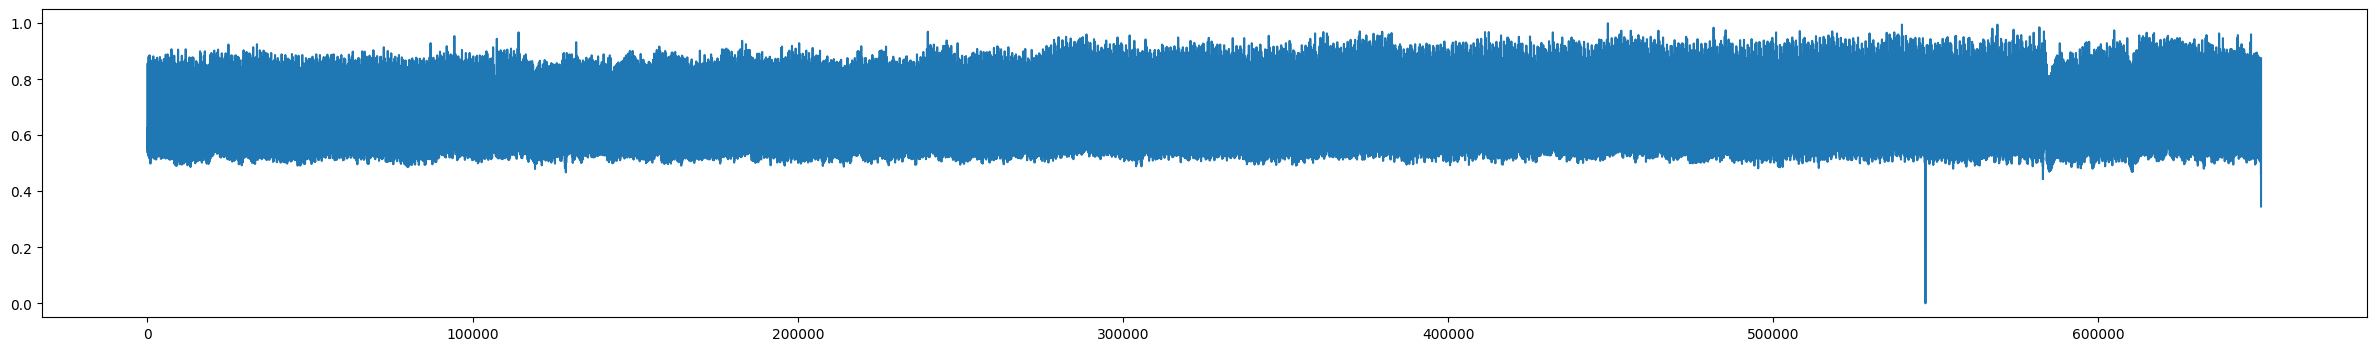

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1))
plt.figure(figsize=(30, 4))
plt.plot(lm)

In [20]:
qrs = wfdb.processing.XQRS(lm, fs=360)
qrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


(2273,)

In [22]:
qrs.qrs_inds.shape

(2273,)

In [33]:
qrs.qrs_inds[qrs.qrs_inds<10800]

array([   76,   370,   662,   946,  1231,  1515,  1809,  2044,  2402,
        2705,  2997,  3282,  3559,  3862,  4170,  4465,  4764,  5060,
        5346,  5633,  5918,  6214,  6526,  6823,  7105,  7391,  7669,
        7953,  8245,  8539,  8837,  9141,  9431,  9710,  9998, 10282,
       10590])

In [36]:
record.p_signal[qrs.qrs_inds[qrs.qrs_inds<10800], 0]

array([0.78 , 0.94 , 0.885, 0.81 , 0.82 , 0.885, 0.945, 0.845, 0.845,
       0.81 , 0.875, 0.82 , 0.78 , 0.885, 0.86 , 0.75 , 0.815, 0.89 ,
       0.82 , 0.925, 0.895, 0.955, 0.81 , 0.84 , 0.865, 0.93 , 0.83 ,
       0.92 , 0.855, 0.845, 0.725, 0.8  , 1.005, 0.855, 0.795, 0.85 ,
       0.865])

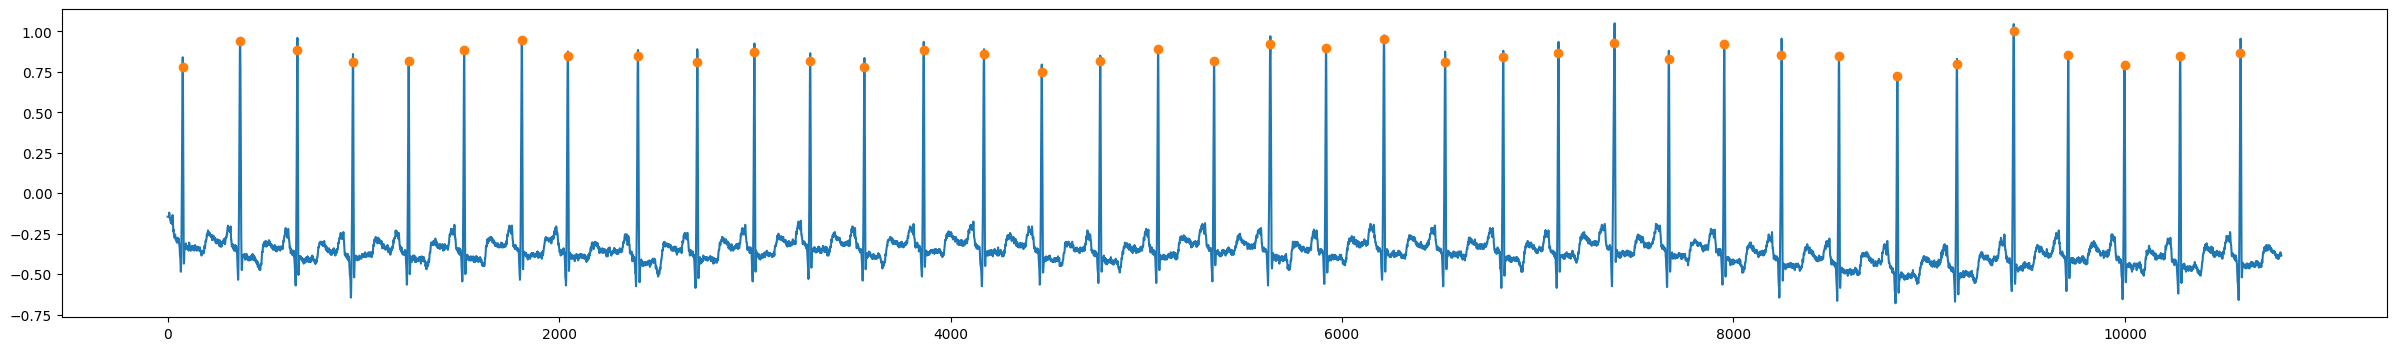

In [45]:
plt.figure(figsize=(30, 4))
plt.plot(record.p_signal[:10800,0])
plt.plot(qrs.qrs_inds[qrs.qrs_inds<10800], record.p_signal[qrs.qrs_inds[qrs.qrs_inds<10800], 0], marker="o", linestyle="none")

In [9]:
wfdb.rdsamp(data+'100')

(array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 {'fs': 360,
  'sig_len': 650000,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV'],
  'sig_name': ['MLII', 'V5'],
  'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']})

In [10]:
ann = wfdb.rdann(data+"100", extension="atr")
ann.sample  

array([    18,     77,    370, ..., 649484, 649734, 649991])

In [47]:
df = []
window_size = 180 #seems to be common roughly 1 heartbeat
for pat_id in patients:
    print('record number', pat_id)
    record = wfdb.rdrecord(data+'100',smooth_frames=True)
    min_max_scaler = preprocessing.MinMaxScaler()
    lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1)).squeeze()
    qrs = wfdb.processing.XQRS(lm, fs=360)
    qrs.detect()
    peaks = qrs.qrs_inds
    for peak in peaks[5:-5]:
        start,end = peak-window_size//2, peak+window_size//2
        df.append(lm[start:end])


record number 100
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 101
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 102
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 103
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 104
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 105
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Runni

In [48]:
len(df)

109008

In [50]:
df[0].shape

(180,)

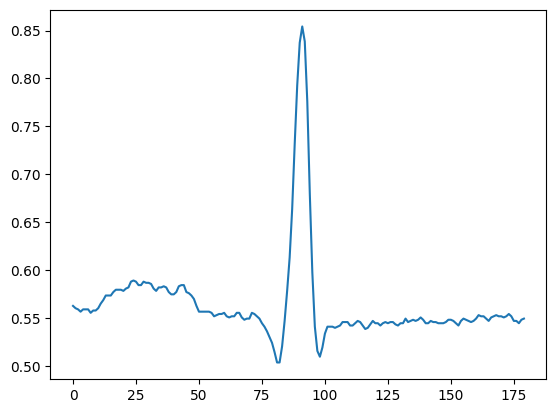

In [55]:
plt.plot(df[2930])

In [14]:
pd.DataFrame(df[:10000], columns=[f"t_{i}" for i in range(180)]).to_csv("data/mit_bih.csv")